<a href="https://colab.research.google.com/github/maryawamaitha/A-Food-Sales-PredictionsProject/blob/main/Project1_FoodSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maryanne Gachema

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [ ]:
filename = '/content/sales_predictions.csv'
sales_cata = pd.read_csv(filename)
sales_cata.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
#1) How many rows and columns?
sales_cata.shape


(8523, 12)

In [ ]:
#2) What are the datatypes of each variable?
sales_cata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#3) Are there duplicates? If so, drop any duplicates.
sales_cata.duplicated().any()

False

In [ ]:
#4) Identify missing values.
sales_cata.info() #**Missing data at column - Item_Weight and Outlet_Size


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
sales_cata.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#5) Decide on how to address the missing values and do it! 
#***Replace the missing values with zero: This does not alter the table in terms of no of rows and column
sales_cata['Item_Weight'].fillna(value = 0, inplace =True)
sales_cata['Outlet_Size'].fillna(value = 'Null', inplace =True)

In [ ]:
#6) Confirm that there are no missing values after addressing them.
sales_cata.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#7) Find and fix any inconsistent categories of data 
#**Inconsitency on the Item Fat Content column
print(sales_cata['Item_Fat_Content'].unique())
print(sales_cata['Item_Type'].unique())
print(sales_cata['Outlet_Size'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'Null' 'High' 'Small']


In [ ]:
sales_cata['Item_Fat_Content'].replace({'reg': 'Regular', 'low fat': 'Low Fat', 'LF': 'Low Fat'}, inplace=True)

In [ ]:
sales_cata['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
sales_cata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Histogram to view the distributions of various features in your dataset.
#Boxplot to view statistical summaries of various features in your dataset.
#Heatmap of the correlation between features.

In [122]:
#Exploring the data set: To view how the outlet_location affected the item sales. From the results, the location did not have an impact on the sales
avg_out = sales_cata.groupby(['Outlet_Location_Type','Outlet_Type'])['Item_Outlet_Sales'].mean()
avg_out

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store         340.329723
                      Supermarket Type1    2313.099451
Tier 2                Supermarket Type1    2323.990559
Tier 3                Grocery Store         339.351662
                      Supermarket Type1    2298.995256
                      Supermarket Type2    1995.498739
                      Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

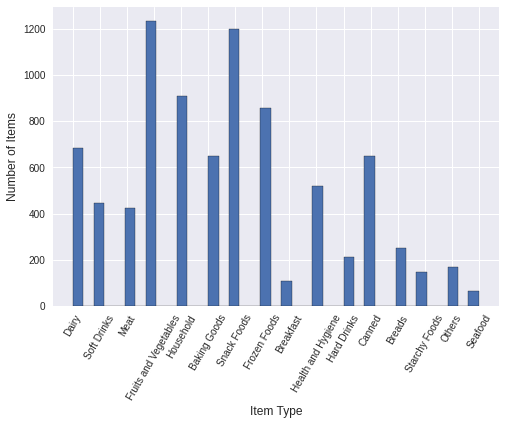

In [ ]:
#This Histogram shows the no of different item types sold in different 
#Fruits and Vegetables and Snack foods are the most bought items
plt.style.use('seaborn')
sales_cata['Item_Type'].hist(bins ='auto', edgecolor = 'black')
plt.xticks(rotation = 60);
plt.xlabel('Item Type', fontsize = 12);
plt.ylabel('Number of Items', fontsize = 12);

In [ ]:
sales_cata['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

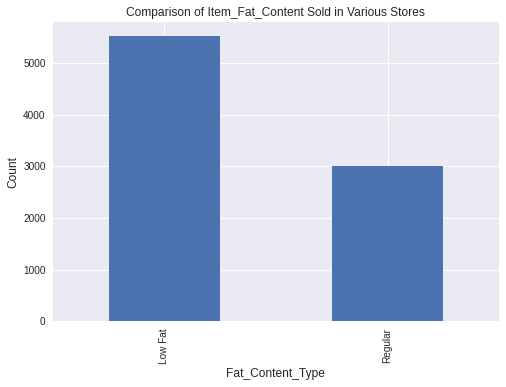

In [123]:
#This histogram shows most items purchased at the different stores were of low_fat content
sales_cata['Item_Fat_Content'].value_counts().plot(kind = 'bar')
plt.title('Comparison of Item_Fat_Content Sold in Various Stores');
plt.xlabel('Fat_Content_Type', fontsize = 12);
plt.ylabel('Count', fontsize = 12);

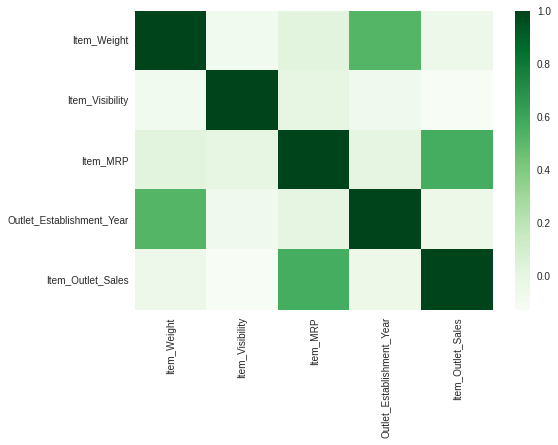

In [ ]:
#Heatmap generally shows a correlation of the variables in the dataset.
corr = sales_cata.corr()
sns.heatmap(corr,cmap='Greens')

In [125]:
item_avg = sales_cata.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64


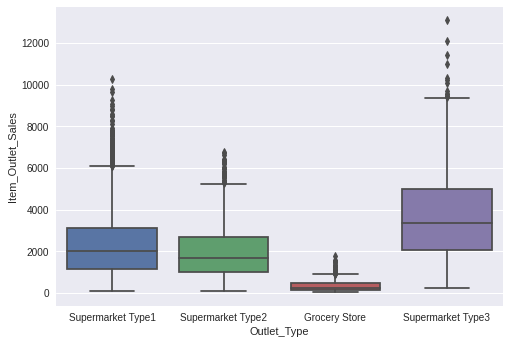

In [124]:
#This bar chart shows the average sales for each outlet. It is clear Supermarket Type 3 had the highest sales 
#while grocery store had the least sales
sns.boxplot(data=sales_cata,x='Outlet_Type',y='Item_Outlet_Sales');
print(item_avg)